In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
PATH = '../../Data/fraud_detection_online_order/'

##### Initial data lookup and Train/Test Split

In [3]:
data = pd.read_csv(f'{PATH}fraud_order_data.csv', parse_dates=['order_date', 'user_account_created_date'])

In [7]:
data.head().transpose()

,0,1,2,3,4
order_id,a2183866942a8ecd252727d95130ff29,61c2c93a011a78c76d2e720120bbfd4c,4049bffb21037c1ba41064802baa86f6,51317d4d2583de8a4813972c94637449,25bc2ec67785edcfa5f93ee14023bf8b
product_id,e7b06ca068c7f50b06ecb5758b51258d,7fec8d8425a12add61c7a83d8270a0cb,59f6d6f76798b14e053f136a5c726d65,a57566363f05f7bba50c1f7d3d6a93f8,3a54c84b0446bf27d46df55edb48c2e1
quantity,1,1,1,1,1
selling_price,5507,6999,5589,79,147
order_date,2014-05-24 00:00:00,2014-05-23 00:00:00,2014-05-28 00:00:00,2014-05-27 00:00:00,2014-05-27 00:00:00
shipping_type,non-ndd,ndd,non-ndd,non-ndd,non-ndd
user_id,00305fba264d3fd74b9da8cb8c6ab654,f1f9a2662d06cfd0abc8d2b7147ade37,a3e8c45cd263e72f7001303a8b22649c,beda308ae5e3bfcefd1d9394c6532bce,beda308ae5e3bfcefd1d9394c6532bce
user_account_created_date,2012-08-13 06:04:03,2012-04-25 09:08:45,2012-08-10 18:44:49,2012-10-19 00:56:02,2012-10-19 00:56:02
address_id,9701f7016eff920d184e4764aac211e2,a3c2e034510ab9f992bf86ad6327fc6b,8fc0ad66f61f9612d9aec2e0ddeebc10,ee8df0f2fb20e881eb503748fa653d29,ee8df0f2fb20e881eb503748fa653d29
city,9f6774de2352cf01e1be77f8aa4cf604,89e5701b3aee3a4011e76c441044028b,64f692fc1ed662e37a49acaf1c0d0b4a,90a60ca1704e4b34248b98bc417c4f58,90a60ca1704e4b34248b98bc417c4f58


From the data, there are two date columns namely order_date and user_account_created_date. Let us see if our data is based on time.

In [8]:
data['user_account_created_date'].value_counts().sort_index()

2005-01-01 00:00:00    1142
2007-10-18 18:07:54       1
2007-10-19 11:38:16       2
2007-11-27 14:41:54       1
2007-12-21 01:50:41       2
                       ... 
2014-05-31 23:54:13       1
2014-05-31 23:54:26       1
2014-05-31 23:54:46       1
2014-05-31 23:57:07       1
2014-05-31 23:57:16       1
Name: user_account_created_date, Length: 296551, dtype: int64

In [9]:
data['order_date'].value_counts().sort_index()

2014-05-20    38567
2014-05-21    39963
2014-05-22    37847
2014-05-23    52283
2014-05-24    32298
2014-05-25    29385
2014-05-26    32450
2014-05-27    47573
2014-05-28    46689
2014-05-29    35858
2014-05-30    60129
2014-05-31    28065
Name: order_date, dtype: int64

We can see that data is ordered based on the column order_date, we cannot randomly sample the data for train, test and validation set. As, there are almost similar number of records, we can divide our train set to be the first 10 days and test set to be last 2 dates.

In [10]:
train = data[data['order_date'] <= '2014-05-29'].reset_index()
test  = data[data['order_date'] > '2014-05-29'].reset_index()

In [11]:
train.describe(include='all')

,index,order_id,product_id,quantity,selling_price,order_date,shipping_type,user_id,user_account_created_date,address_id,...,category_purchase_count_j9e,category_purchase_count_jek,category_purchase_count_tyy,category_purchase_count_vdm,category_purchase_count_X6bo,category_purchase_count_X2oq,category_purchase_count_mcr,category_purchase_count_osp,category_purchase_count_r18,label
count,392913.000000,392913,392913,392913.000000,392913.000000,392913,392913,392913,392913,392913,...,376685.000000,376685.000000,376685.000000,376685.000000,376685.000000,376685.000000,376685.000000,376685.000000,376685.000000,392913
unique,NaN,392913,40983,NaN,NaN,10,2,244873,238057,255555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,f45bf75c21b8de03e00357e60bdf5506,2670d7fc0f6568edf1cfea1d2bbb57dc,NaN,NaN,2014-05-23 00:00:00,non-ndd,10956db6a8fc8e92d6d24b7990308ccb,2013-06-08 12:18:42,556241eb6a126624dd1bf865d64b03cf,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,normal
freq,NaN,1,23129,NaN,NaN,52283,364802,1265,1265,1265,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,373872
first,NaN,NaN,NaN,NaN,NaN,2014-05-20 00:00:00,NaN,NaN,2005-01-01 00:00:00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2014-05-29 00:00:00,NaN,NaN,2014-05-29 23:55:39,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,240545.099531,NaN,NaN,1.089653,4132.817127,NaN,NaN,NaN,NaN,NaN,...,0.232834,0.109925,2.231042,0.069047,1.579620,0.854284,0.020149,0.381916,0.141221,NaN
std,138848.316606,NaN,NaN,0.393928,7054.316275,NaN,NaN,NaN,NaN,NaN,...,1.744839,0.767689,7.072392,0.797317,9.244483,5.127773,0.389773,2.549671,1.378436,NaN
min,0.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,120099.000000,NaN,NaN,1.000000,200.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [12]:
def data_information(df, id_cols):
    ## Removing ID columns
    df = df.drop(columns=id_cols)

    ## Creating Empty Data Frame
    data_info = pd.DataFrame(np.random.randn(0, 12) * 0,
                             columns=['No. of Observations (Nrow)',
                                      'No. of Variables (Ncol)',
                                      'No. of Numeric Variables',
                                      'No. of Factor Variables',
                                      'No. of Categorical Variables',
                                      'No. of Logical Variables',
                                      'No. of Date Variables',
                                      'No. of Zero variance Variables (Uniform)',
                                      '% of Variables having complete cases',
                                      '% of Variables having <=50% missing cases',
                                      '% of Variables having >50% missing cases',
                                      '% of Variables having >90% missing cases'])

    ## Data Inofrmation
    data_info.loc[0, 'No. of Observations (Nrow)'] = df.shape[0]
    data_info.loc[0, 'No. of Variables (Ncol)'] = df.shape[1]
    data_info.loc[0, 'No. of Numeric Variables'] = df._get_numeric_data().shape[1]
    data_info.loc[0, 'No. of Factor Variables'] = df.select_dtypes(include='category').shape[1]
    data_info.loc[0, 'No. of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
    data_info.loc[0, 'No. of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
    data_info.loc[0, 'No. of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
    data_info.loc[0, 'No. of Zero variance Variables (Uniform)'] = df.loc[:, df.apply(pd.Series.nunique) == 1].shape[1]

    null_per = pd.DataFrame(df.isnull().sum()/df.shape[0])
    null_per.columns = ['null_per']

    data_info.loc[0, '% of Variables having complete cases'] = null_per[null_per.null_per == 0].shape[0] * 100 / \
                                                               df.shape[1]
    data_info.loc[0, '% of Variables having <=50% missing cases'] = null_per[null_per.null_per <= 0.50].shape[0] * 100 / \
                                                                    df.shape[1]
    data_info.loc[0, '% of Variables having >50% missing cases'] = null_per[null_per.null_per > 0.50].shape[0] * 100 / \
                                                                   df.shape[1]
    data_info.loc[0, '% of Variables having >90% missing cases'] = null_per[null_per.null_per > 0.90].shape[0] * 100 / \
                                                                   df.shape[1]

    ## Transposing Data to get in consumable format
    data_info = data_info.transpose()
    data_info.columns = ['Value']
    data_info['Value'] = data_info['Value'].astype(int)

    return data_info

In [13]:
id_cols = ['label']
data_information(train, id_cols)

,Value
No. of Observations (Nrow),392913
No. of Variables (Ncol),40
No. of Numeric Variables,29
No. of Factor Variables,0
No. of Categorical Variables,9
No. of Logical Variables,0
No. of Date Variables,2
No. of Zero variance Variables (Uniform),0
% of Variables having complete cases,45
% of Variables having <=50% missing cases,100


In [14]:
def num_count_summary(df, id_cols):

    df_num = df.drop(columns=id_cols)._get_numeric_data()

    data_info_num = pd.DataFrame()
    ## Counts Stats on Numeric Variable
    try:  ## incase numeric variables not present
        i = 0
        for c in df_num.columns:
            data_info_num.loc[c, 'Negative Values Count'] = df_num[df_num[c] < 0].shape[0]
            data_info_num.loc[c, 'Positive Values Count'] = df_num[df_num[c] > 0].shape[0]
            data_info_num.loc[c, 'Zeros Count'] = df_num[df_num[c] == 0].shape[0]
            data_info_num.loc[c, 'Unique Count'] = len(df_num[c].unique())
            data_info_num.loc[c, 'Negative Infinity Count'] = df_num[df_num[c] == -np.inf].shape[0]
            data_info_num.loc[c, 'Positive Infinity Count'] = df_num[df_num[c] == np.inf].shape[0]
            data_info_num.loc[c, 'Missing Percentage'] = df_num[df_num[c].isnull()].shape[0] / df_num.shape[0]
            data_info_num.loc[c, 'Count of Outliers'] = outlier_count(df_num[c])
            i = i + 1
    except:
        pass
    print("Outlier >75th %tile + 1.5IQR & <25th %tile - 1.5IQR")
    return data_info_num

In [15]:
num_count_summary(train, ['label'])

Outlier >75th %tile + 1.5IQR & <25th %tile - 1.5IQR


,Negative Values Count,Positive Values Count,Zeros Count,Unique Count,Negative Infinity Count,Positive Infinity Count,Missing Percentage
index,0.0,392912.0,1.0,392913.0,0.0,0.0,0.0


##### Check for imbalanced data --> usually fraud detection/ anomaly detection datasets are imbalanced

<AxesSubplot:xlabel='label', ylabel='count'>

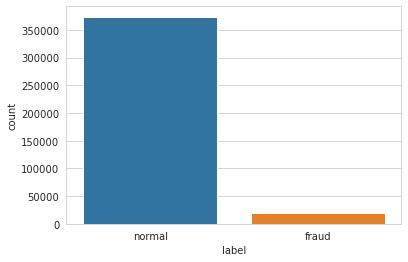

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='label', data=train)

In [17]:
train['label'].value_counts()

normal    373872
fraud      19041
Name: label, dtype: int64

It can be observed that our dataset is imbalanced. Let us continue with EDA before balancing the data

##### Missing Values 1

<AxesSubplot:>

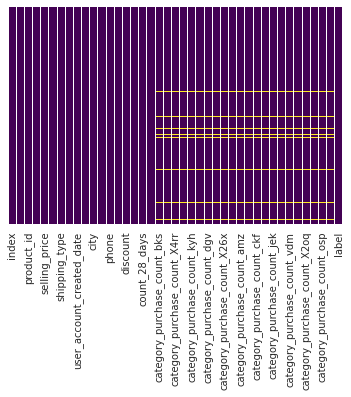

In [18]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [19]:
train.isnull().sum().sort_values(ascending=False)

category_purchase_count_X4rr    16228
category_purchase_count_amz     16228
category_purchase_count_bks     16228
category_purchase_count_X4kt    16228
category_purchase_count_r18     16228
category_purchase_count_dep     16228
category_purchase_count_kyh     16228
category_purchase_count_mgl     16228
category_purchase_count_dgv     16228
category_purchase_count_X26x    16228
category_purchase_count_t06     16228
category_purchase_count_ixq     16228
category_purchase_count_reh     16228
category_purchase_count_vdm     16228
category_purchase_count_osp     16228
category_purchase_count_ckf     16228
category_purchase_count_X2oq    16228
category_purchase_count_X6bo    16228
category_purchase_count_mcr     16228
category_purchase_count_tyy     16228
category_purchase_count_jek     16228
category_purchase_count_j9e     16228
address_id                          0
order_id                            0
product_id                          0
quantity                            0
selling_pric

In [20]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [21]:
print('Number of columns having missing values: {}'.format(len(missing_data[missing_data['Percent']>0])))
print()
print(missing_data[missing_data['Percent']>0])

Number of columns having missing values: 22

                              Total   Percent
category_purchase_count_X4rr  16228  0.041302
category_purchase_count_amz   16228  0.041302
category_purchase_count_bks   16228  0.041302
category_purchase_count_X4kt  16228  0.041302
category_purchase_count_r18   16228  0.041302
category_purchase_count_dep   16228  0.041302
category_purchase_count_kyh   16228  0.041302
category_purchase_count_mgl   16228  0.041302
category_purchase_count_dgv   16228  0.041302
category_purchase_count_X26x  16228  0.041302
category_purchase_count_t06   16228  0.041302
category_purchase_count_ixq   16228  0.041302
category_purchase_count_reh   16228  0.041302
category_purchase_count_vdm   16228  0.041302
category_purchase_count_osp   16228  0.041302
category_purchase_count_ckf   16228  0.041302
category_purchase_count_X2oq  16228  0.041302
category_purchase_count_X6bo  16228  0.041302
category_purchase_count_mcr   16228  0.041302
category_purchase_count_tyy   16228

There are 22 columns having null values. It is interesting that same percentage of data is missing for all the columns that are missing. Let us see if all these columns are such that, if one column is missing, all the other columns are missing too.(This might be true if you look at the heatmap above, but we shall try to look again to confirm)

In [22]:
null_value_index_df = pd.DataFrame()
for col in missing_data[missing_data['Percent'] > 0].index:
    null_value_index_df[col+'null_index'] = train[train[col].isnull()].index.to_list()

<AxesSubplot:>

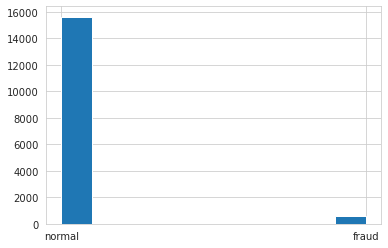

In [23]:
train.iloc[null_value_index_df.iloc[:,1], train.columns.get_loc('label')].hist()

In [24]:
train.iloc[null_value_index_df.iloc[:,1], train.columns.get_loc('label')].value_counts()

normal    15635
fraud       593
Name: label, dtype: int64

As we have less data for the label 'fraud', we cannot afford to delete the rows having null values. Hence, we can go for imputing these 22 columns.

##### Imputing Missing Values 1

<ipython-input-25-f975c5454227>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(8, 6))


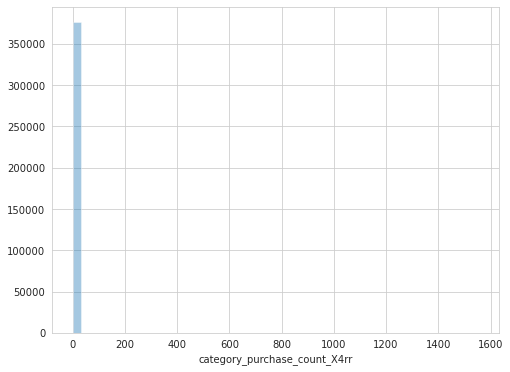

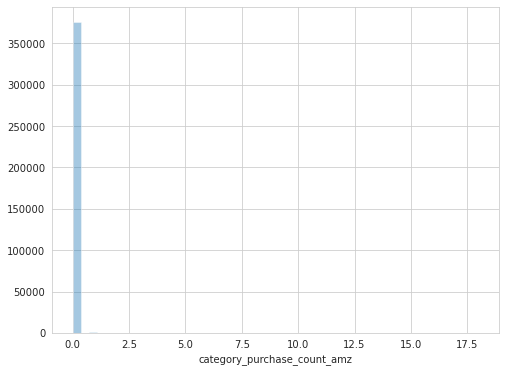

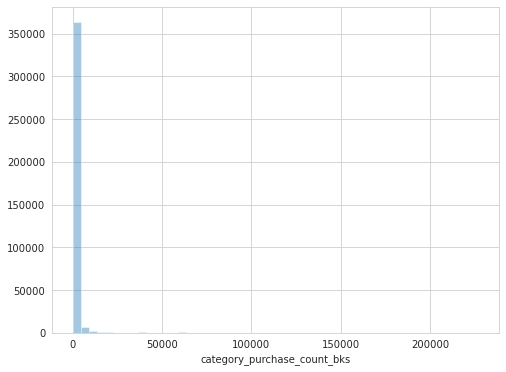

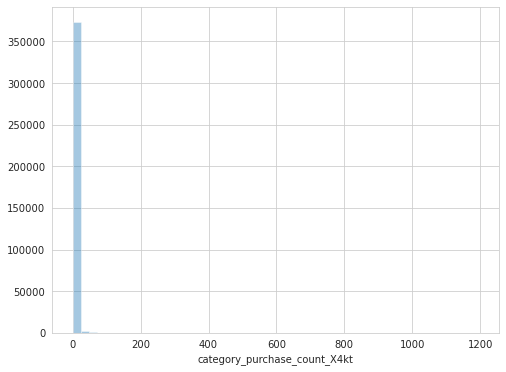

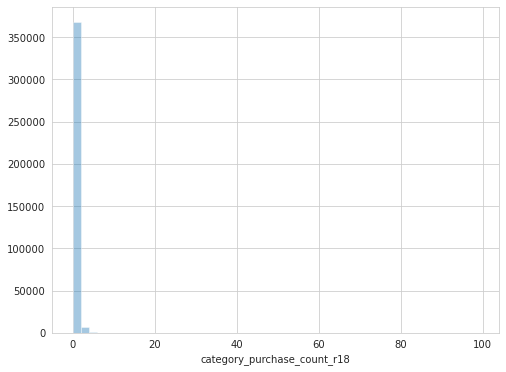

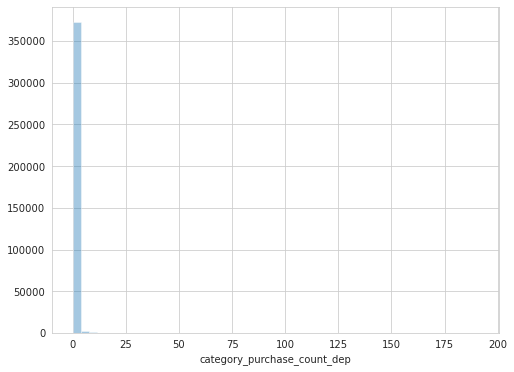

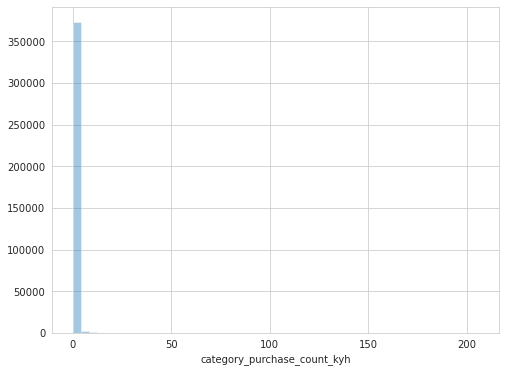

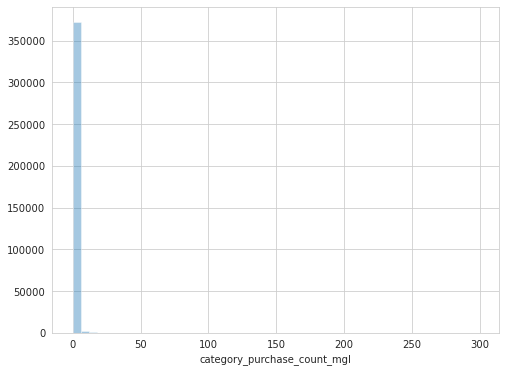

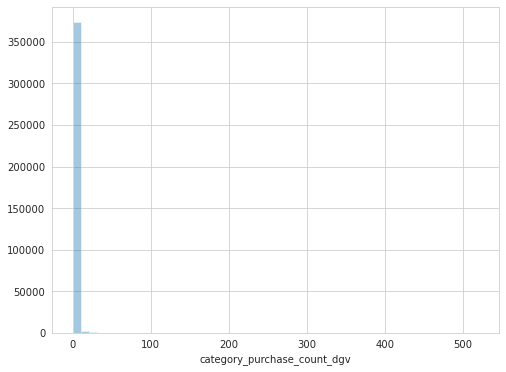

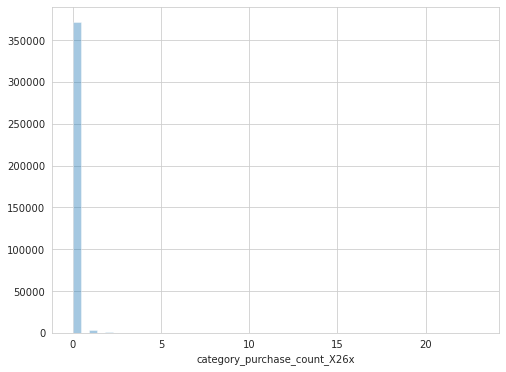

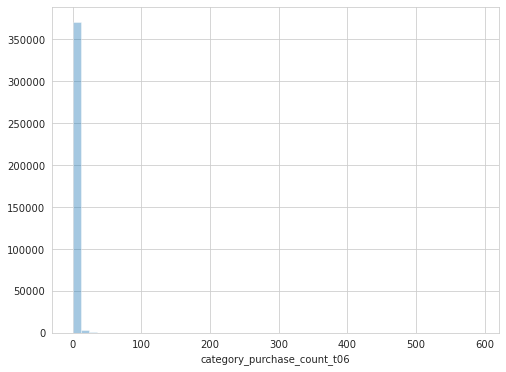

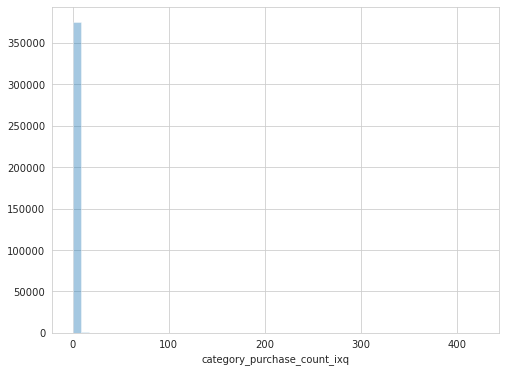

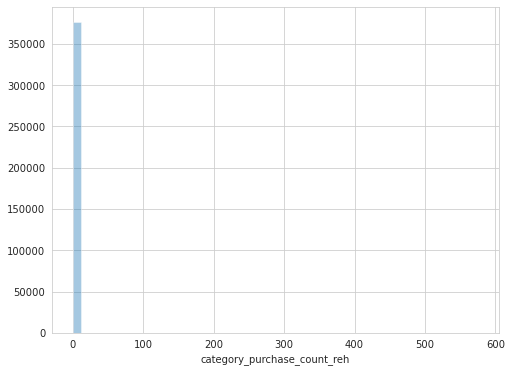

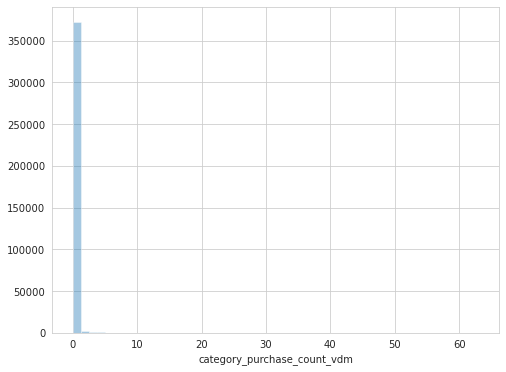

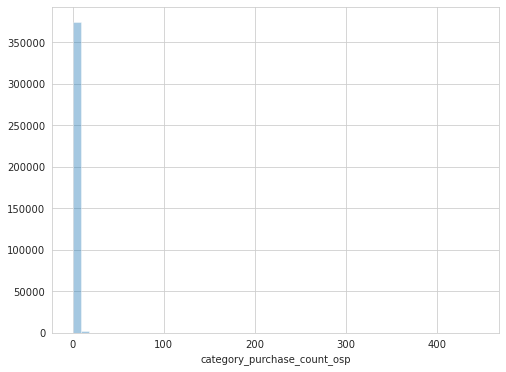

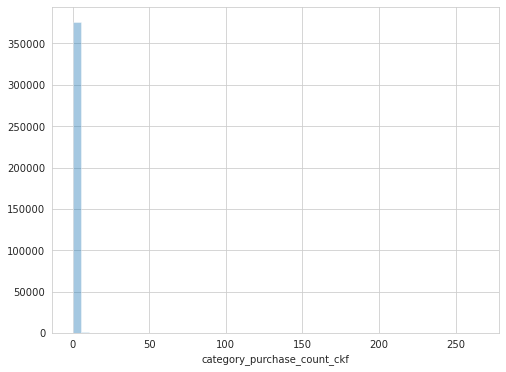

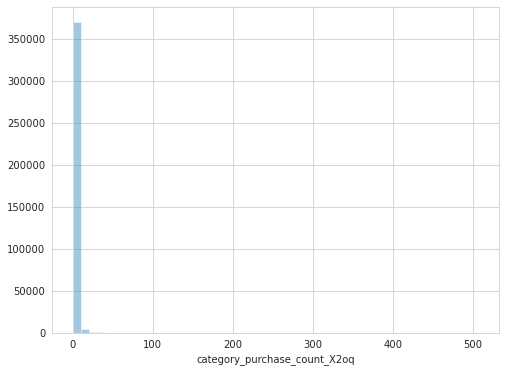

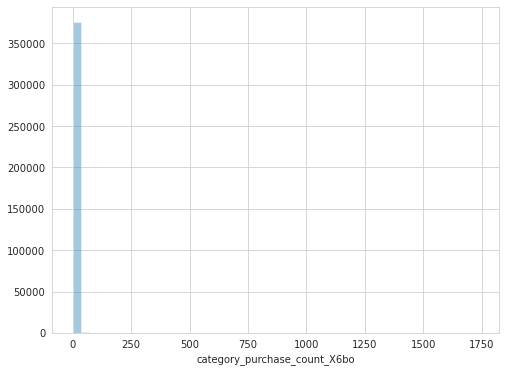

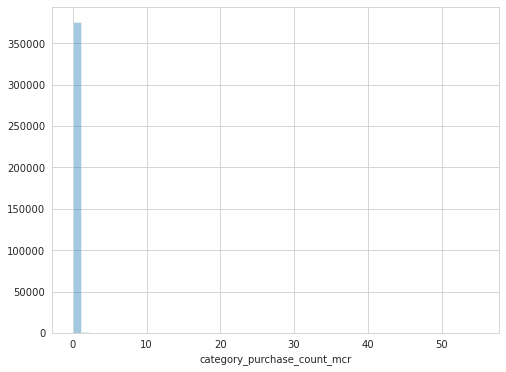

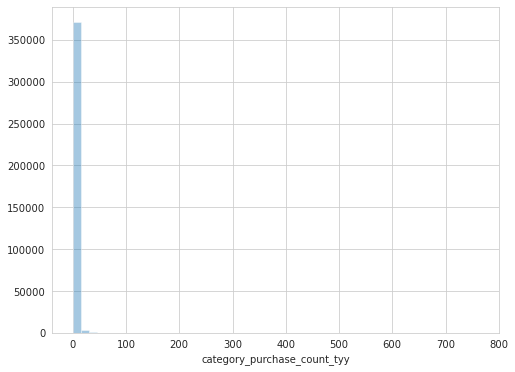

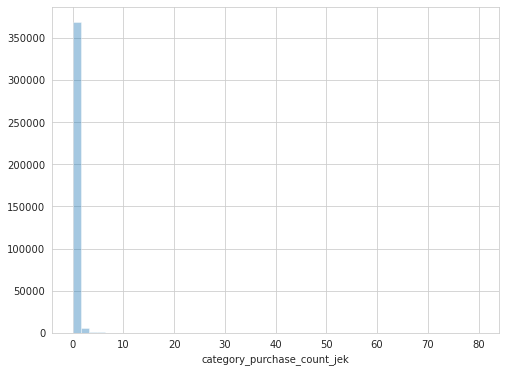

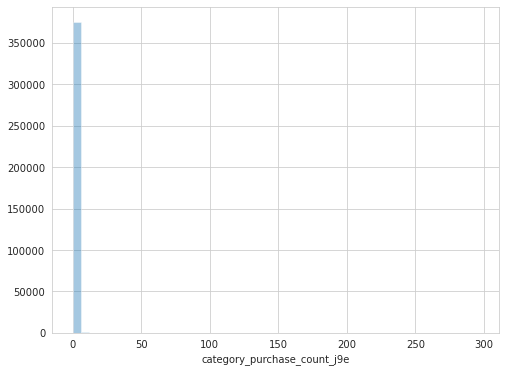

In [25]:
for col in missing_data[missing_data['Percent']>0].index:
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.distplot(train[col].dropna(), kde=False)


In [27]:
train.loc[train['label'].eq('normal'), 'category_purchase_count_mcr'].mean()

0.020528309471104324

The data is very skewed. It is tough to find insights into data when looking for imputing values. So, let us balance the dataset by undersampling and come back to imputing

##### Balance the dataset because the values are very skewed (Observed when trying to impute Null Values)

In [28]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=32)
X_train, y_train = rus.fit_sample(train.drop(['label'], axis=1), train['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

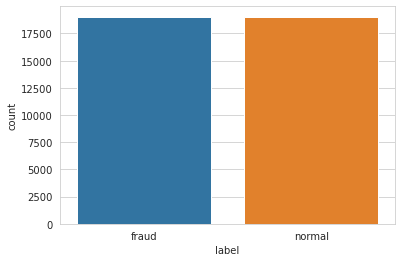

In [29]:
sns.set_style('whitegrid')
sns.countplot(x=y_train)

As the dataset is now balanced, let us being our data exploration again, but now on the new balanced dataset.

##### Missing Values 2

<AxesSubplot:>

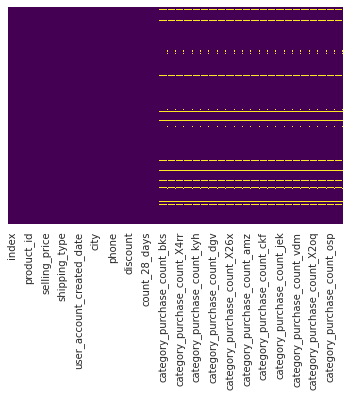

In [31]:
sns.heatmap(X_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [30]:
X_train.isnull().sum().sort_values(ascending=False)

category_purchase_count_r18     1395
category_purchase_count_t06     1395
category_purchase_count_bks     1395
category_purchase_count_osp     1395
category_purchase_count_X4rr    1395
category_purchase_count_dep     1395
category_purchase_count_kyh     1395
category_purchase_count_mgl     1395
category_purchase_count_dgv     1395
category_purchase_count_ixq     1395
category_purchase_count_X26x    1395
category_purchase_count_X4kt    1395
category_purchase_count_amz     1395
category_purchase_count_vdm     1395
category_purchase_count_reh     1395
category_purchase_count_X2oq    1395
category_purchase_count_X6bo    1395
category_purchase_count_mcr     1395
category_purchase_count_tyy     1395
category_purchase_count_jek     1395
category_purchase_count_j9e     1395
category_purchase_count_ckf     1395
user_account_created_date          0
order_id                           0
product_id                         0
quantity                           0
selling_price                      0
o

In [36]:
total = X_train.isnull().sum().sort_values(ascending=False)
percent = (X_train.isnull().sum()/len(X_train)).sort_values(ascending=False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values = missing_values[missing_values['Total'] > 0]
missing_values

,Total,Percent
category_purchase_count_r18,1395,0.036631
category_purchase_count_t06,1395,0.036631
category_purchase_count_bks,1395,0.036631
category_purchase_count_osp,1395,0.036631
category_purchase_count_X4rr,1395,0.036631
category_purchase_count_dep,1395,0.036631
category_purchase_count_kyh,1395,0.036631
category_purchase_count_mgl,1395,0.036631
category_purchase_count_dgv,1395,0.036631
category_purchase_count_ixq,1395,0.036631


In [44]:
new_train = pd.concat([X_train, y_train], axis=1)

In [50]:
null_indices = X_train[X_train['category_purchase_count_r18'].isnull()].index.to_list()

<AxesSubplot:>

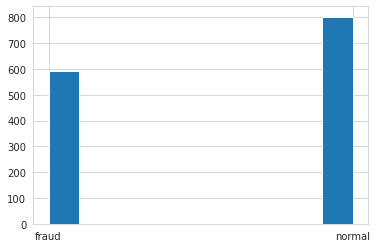

In [51]:
new_train.iloc[null_indices, new_train.columns.get_loc('label')].hist()

We cannot delete the rows with null values as it contains examples that hold important information. We have to impure them with right values

##### Imputing Missing Values 2

In [59]:
def dist_plots(df, col):
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.distplot(df[col].dropna(), kde=False)

<ipython-input-59-f51e2a9557bf>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(8, 6))


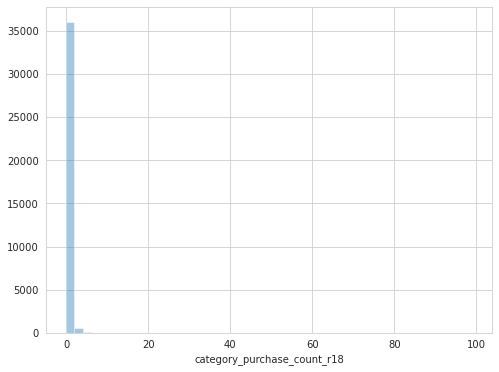

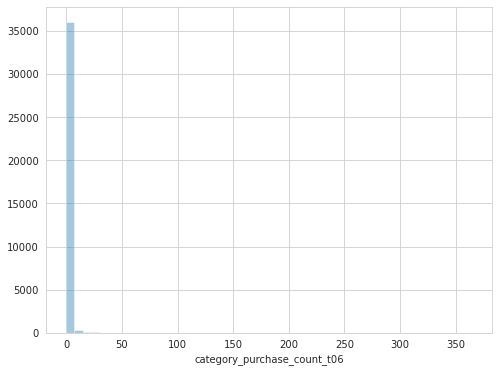

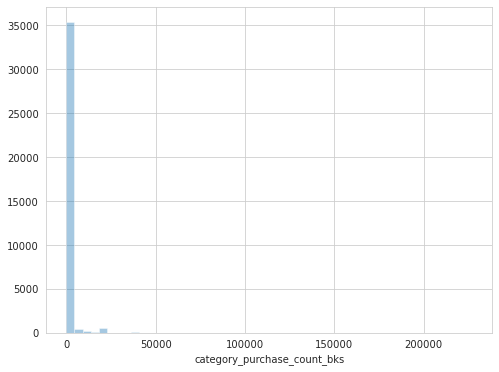

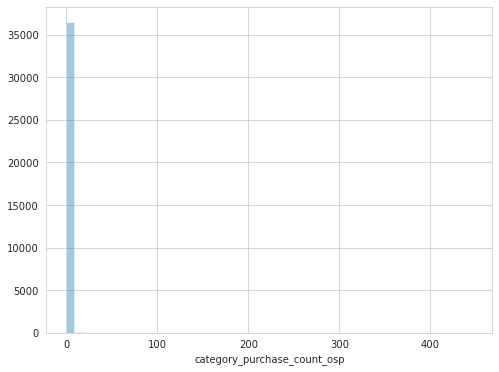

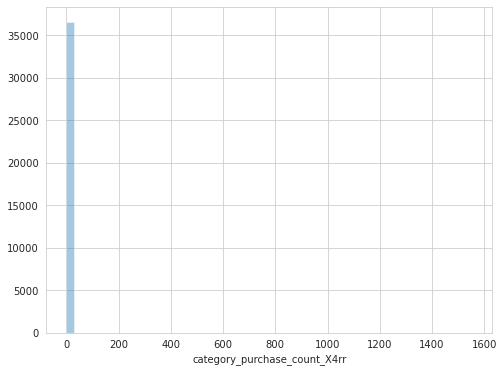

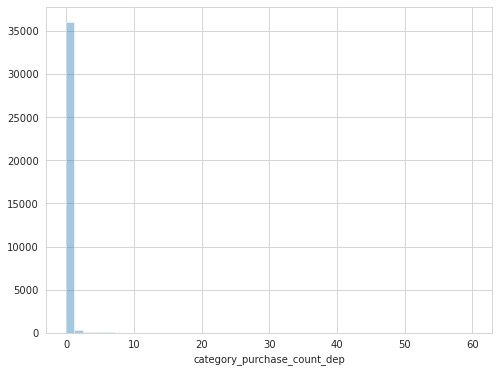

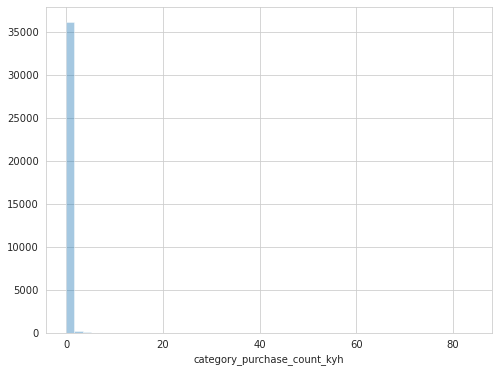

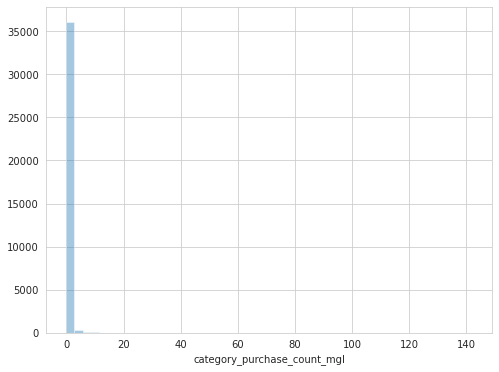

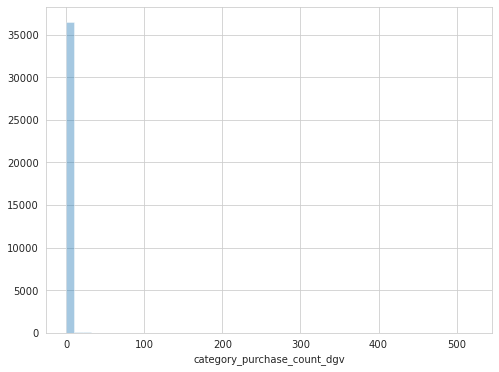

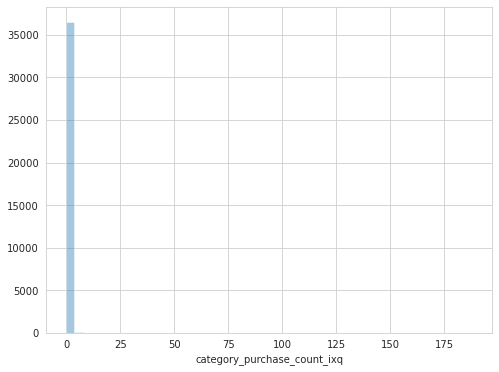

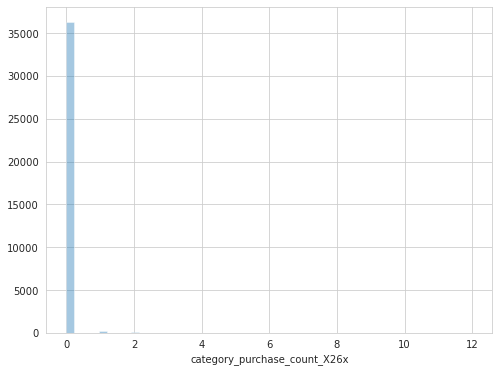

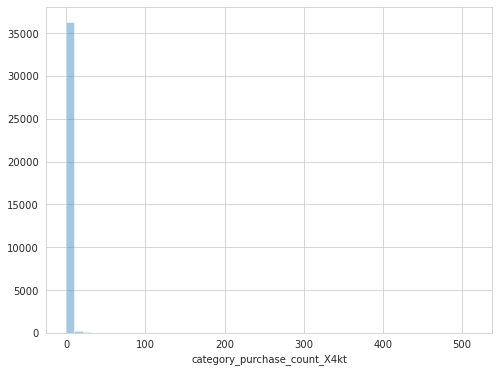

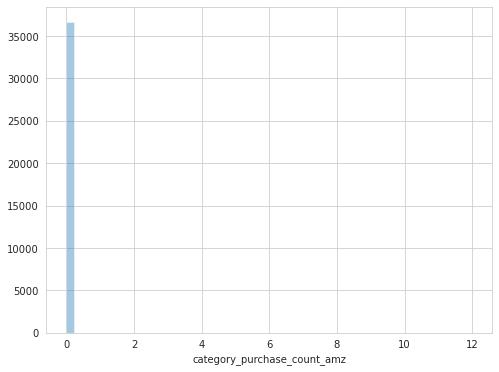

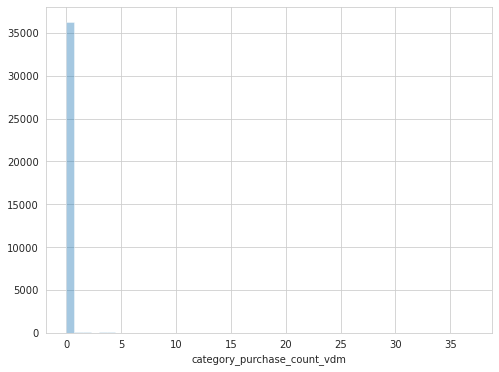

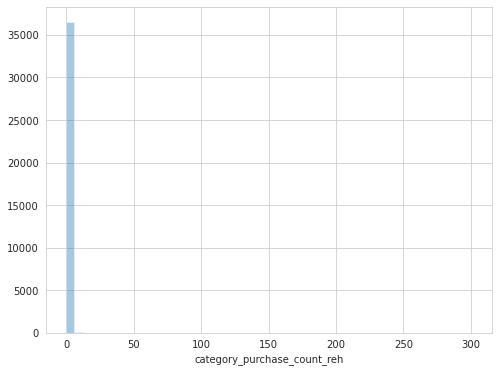

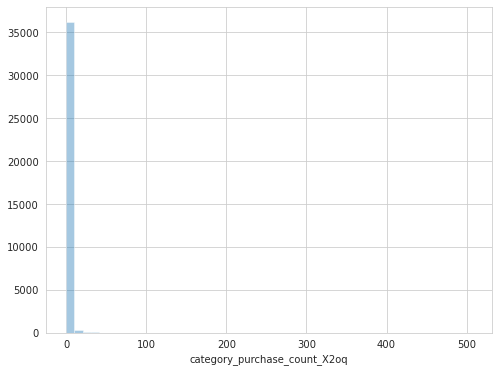

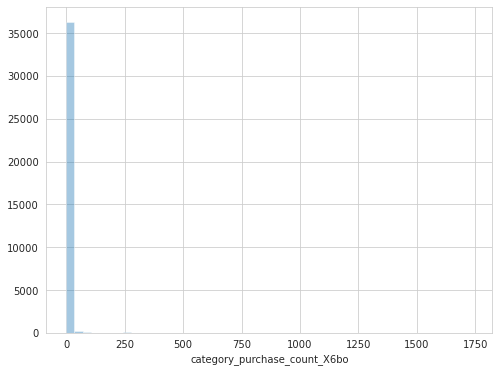

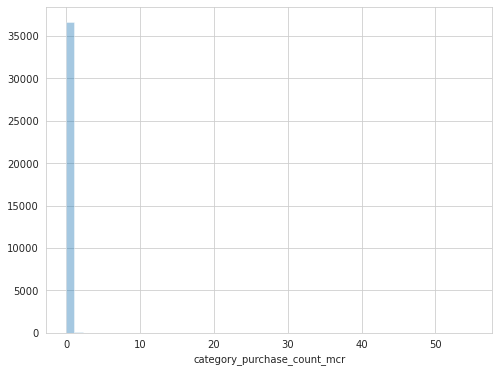

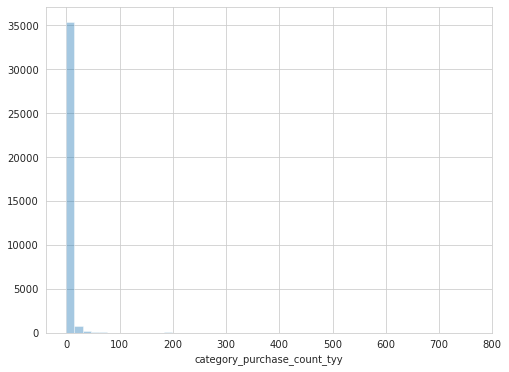

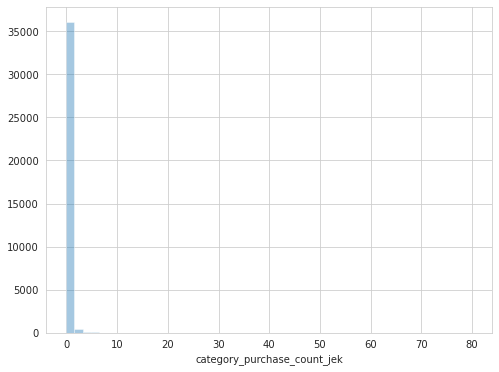

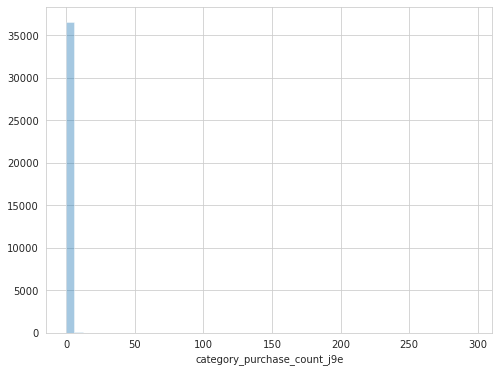

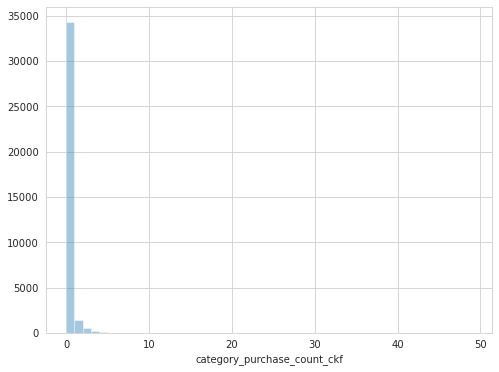

In [60]:
for col in missing_values.index:
    dist_plots(X_train, col)

In [69]:
def impute_median_values(df, columns):
    df = df.copy()
    for col in columns:
    # for col in df.select_dtypes(include=np.number):
        df[col] = df[col].fillna(df[col].median())
    return df

In [70]:
X_train = impute_median_values(X_train, missing_values.index.to_list())

#### Univariate and Bivariate Analysis

##### Univariate Analysis